
# CP 2025-2026: Q2 Lecture 6 - Interpolation and regression

### General Guidelines

> ⚠️⚠️⚠️ READ CAREFULLY ⚠️⚠️⚠️

- Do not add, delete or create cells, write the answer only in the space marked with the three dots (`...`). Where function skeletons are provided, it is assumed that that function can be called again with different inputs somewhere else. So be careful to write code outside of functions.
  - Function should be ['pure'](https://en.wikipedia.org/wiki/Pure_function), thus no side effects, unless otherwise specified.
- Run the the first cell to import all libraries when opening the notebook before running your own code.
- Read carefully what is required to be printed/returned/plotted in the answer. Please do not output what is not asked for. 
  - If you used the print function for debugging, comment it out ( Ctlr + / ) before submitting
- All plots should have title, xlabel, ylabel, and legend (if there are more than one curve on the plot)
- Use the `help()` function, consult python documentation when using new functions, or do a web search and consult [stackoverflow](https://stackoverflow.com/questions/tagged/python)
- Please read the error messages if you get any, and try to understand what they mean. Debugging code is an essential skill to develop.
- You can use `%debug` to start an IPython console in a cell (or a scratchpad cell!) after an exception has occurred to try to debug.
- You can use `%pdb` to toggle the Python DeBugger (pdb) auto start after an unhandled exception.
- In the assignments you will find some tests put in place, to help you verify your solution. If these fail you are certain you did something wrong, thus look at the hints they provide. But passing these tests does __not__ mean your solution is actually correct.

Make sure you use `python3.12` and the package versions as stated in the provided `requirements.txt`. This file should also be on the course page.

In [1]:
# Importing relevant libraries in the assignment

# This will create static plots (no zooming etc.)
# otherwise try just plain `%matplotlib`, or install a backend such as ipympl or PyQt5 and
# do or `%matplotlib ipympl` `%matplotlib qt`
%matplotlib inline

REPEAT_IMPORTS = True

if REPEAT_IMPORTS or ("IMPORTED_ALL" not in globals()):  # To save you a bit of time

    def print_import_info(package):
        print(
            "Successfully imported %-15s \tVersion: %10s"
            % (package.__name__, package.__version__)
        )

    ### Standard library imports

    import sys

    print("Python version {}".format(sys.version))
    if sys.version_info < (3, 12):
        print(
            "\u001b[31m"  # red
            "\u001b[1m"  # bold
            "WARNING: Use Python 3.12 or newer not to encounter any errors or problems later on. You can chance the the version. This sometime can be done by switching the kernel under the 'Kernel' tab."
            "\u001b[0m"  # reset
        )
    del sys  # Do not need it anymore

    # import functools
    import typing
    from typing import Dict, List, Tuple, Union

    ### Import third party libraries
    # Initialize self assessment helper
    import otter

    grader = otter.Notebook("Assignment_Q2_L6.ipynb")

    import os

    import numpy as np
    import numpy.typing as npt

    print_import_info(np)

    import pandas as pd

    print_import_info(pd)

    import scipy
    import scipy.interpolate
    import scipy.optimize

    print_import_info(scipy)

    import matplotlib
    import matplotlib.cm as cm
    import matplotlib.pyplot as plt

    print_import_info(matplotlib)

    IMPORTED_ALL = True
    print("Finished importing packages")
else:
    print("Already imported all packages")

Python version 3.12.10 (v3.12.10:0cc81280367, Apr  8 2025, 08:46:59) [Clang 13.0.0 (clang-1300.0.29.30)]
Successfully imported numpy           	Version:      2.3.2
Successfully imported pandas          	Version:      2.3.1
Successfully imported scipy           	Version:     1.16.1
Successfully imported matplotlib      	Version:     3.10.5
Finished importing packages


# Introduction
This assignment is based on the Lecture on *Surface tension and wetting* of the course Interfaces and Particles of Dr. Laura Rossi and Dr. Valeria Garbin.

In this assignment, we will consider a droplet sliding on a plane with inclination $\alpha$. Consider the following picture as a schematic [*Avoontuur, F.; 'Electrowetting assisted droplet removal
from an inclined electrode', BEP Thesis, 2022*]:

<img src="https://imgur.com/egjH2vz.png" width=500>


# Part 1: Interpolation

We have obtained measurements providing insight into the velocity of the sliding droplet over time. In the first part of this assignment, we would like to use the provided data by applying interpolation.

## Question 1: Data loading and visualization

The measured datapoints are contained in the file *data.csv* . One of the most used packages to handle dataframes in Python is pandas [[documentation]](https://pandas.pydata.org/). This library allows you to import, analyze and export data generally from excel or csv files. In this case, the data is stored in a comma-separated values, i.e., `.csv`, file.
There are plenty of ways to import it in a pandas DataFrame, but a simple one just requires the function *pandas.read_csv* [[documentation]](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) with a couple of tweaks. We ask you to use the pandas.read_csv function in the following exercise.

* Generate a pandas DataFrame object that has 2 columns: Velocity[mm/s] and Time[s].

* Plot Time [s] and Velocity [mm/s] in a plot (you can also use pandas plotting features to do this).

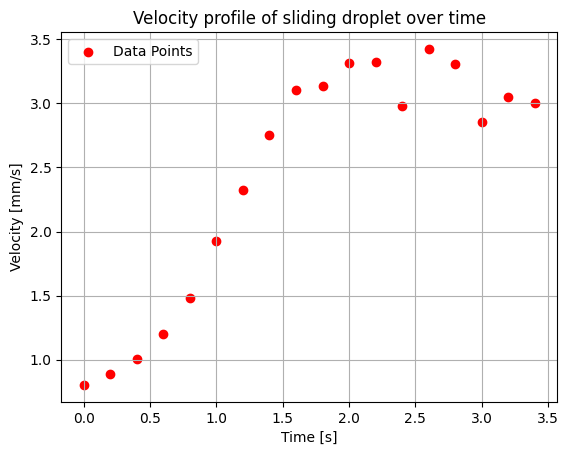

In [2]:
# Read the data
data = pd.read_csv("/Users/oliverlohr/Documents/TUDelft/y1/q1/computational_practicum/q_2/assignments/assignment_6/data.csv")

plt.scatter(data["Time[s]"], data["Velocity[mm/s]"], color="red", label="Data Points")
plt.legend()
plt.title("Velocity profile of sliding droplet over time")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [mm/s]")
plt.grid()
plt.show()

In [3]:
grader.check("q1.1")

q1.1 results: All test cases passed!

## Question 2: Spline interpolation

Now apply cubic spline interpolation to the given datapoints using cubic splines. For this, use [scipy.interpolate.interp1d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d).

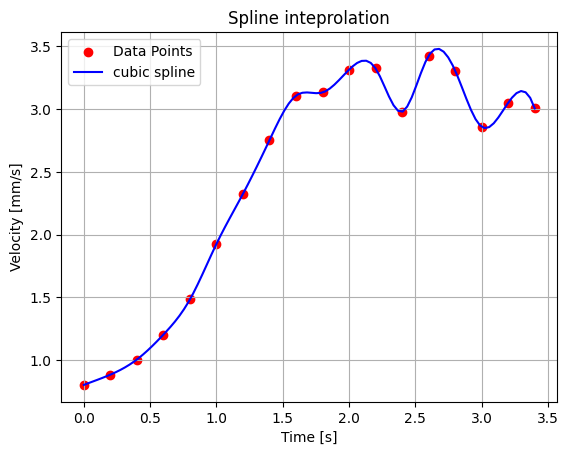

In [4]:
x_test = np.linspace(0, 3.4, 100)

# the interp1d function generates a function form which the curve can be generated when a list of x values is later provided 
interp_spline = scipy.interpolate.interp1d(data['Time[s]'], data["Velocity[mm/s]"], kind = 'cubic')

y_interp_spline = interp_spline(x_test)

# Plot the result
plt.scatter(data["Time[s]"], data["Velocity[mm/s]"], color="red", label="Data Points")
plt.plot(x_test, y_interp_spline, color="blue", label="cubic spline")
plt.legend()
plt.title("Spline inteprolation")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [mm/s]")
plt.grid()
plt.show()

In [5]:
grader.check("q1.2")

q1.2 results: All test cases passed!

# Part 2: Drop sliding on inclined plane

In the second part of this assignment, we will perform regression on the given data. For the first task of part two, we will assume that we have no knowledge of the physics of the sliding droplet and perform polynomial regression. For the second task of part two, we will take the force balance into consideration and perform nonlinear regression.

## Question 1: Polynomial regression

Given the velocity-time datapoints, we would like to predict the velocity of such a droplet at time points other than the measured ones. For this part of the assignment, we assume that we are ignorant of the physics of this sliding droplet. From the plot we generated, we observe that the velocity-time relation is not linear and thus opt for polynomial regression for now.

To do this, you should
* Implement a generic function `polynomial_regression_coefficients` that takes as input 
    - the arrays of `x` and corresponding `y` values, both of type `npt.NDArray`
    - the degree of the polynomial fit, `degree`, of type `int`.
    - IMPORTANT: Use [numpy.linalg.solve](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) to solve the normal equation.

    The function `polynomial_regression_coefficients` should output the derived coefficients (as `npt.NDArray`) of the fitted polynomial of a given degree.
* Implement a generic function `predict_polynomial_regression` that outputs the predicted function values for a set of pre-determined polynomial regression coefficients. The input arguments are
    - `coeffs` (npt.NDArray): The coefficients of the polynomial used for fitting.
    - `x` (npt.NDArray): The x-values at which to produce the predicted values.

    The function `predict_polynomial_regression` should return the predicted values as `npt.NDArray`.

Finally, test you implementation for the given example and plot the result.




In [6]:
# Your implementation of the polynomial_regression function
# You are given velocity-tiem dataponts, you wish to predict the velocity of such a droplet at time points other than the ones measured. Observed is that the relationship between velocity-time is not linear, and thus opt for polynomial regression


def polynomial_regression_coefficients(x:npt.NDArray, y:npt.NDArray, degree:int)->npt.NDArray:
    """
    This function outputs the predicted function values for a set of pre-determined polynomial regression coefficients.

    This function find the coefficients 


    In this  case I want to solve the w = (X^T X)^{-1} X^T y using the direct method 


    
    ARGS: 
        x           (npt.NDArray):
        y           (npt.NPArray):
        degree              (int):
    Returns:
        pred        (npt.NDArray): the predicted y values for the function"""

    X = np.vander(x,N= degree+1, increasing= True)
    XTx = X.T @ X
    XTy = X.T @ y
    coef = np.linalg.solve(XTx, XTy)


    return coef


def predict_polynomial_regression(coeffs:npt.NDArray, x:npt.NDArray)->npt.NDArray:
    """
    This function calculates the polynomial based on existing coefficients .... idk fill this out 

    This function predicts the y value based on the pre-predicted coefficients. This follows the following equation:
        y = sum_(j=0)^M w_j * x_i^j
            Where M is the degree 


    
    ARGS: 
        coeffs          (npt.NDArray):
        x               (npt.NDArray): the x values for which the polynomials are to be computed for (this is not the same x for which the funciton was tested for )
    Returns:
        pred            (npt.NDArray): the pre-determined polynomial regression coefficients"""
    
    
    degree = len(coeffs) - 1

    X = np.vander(x, N = degree+1, increasing= True)
    pred = X@coeffs
    return pred

In [7]:
# Your implementation of the predict function


Fitted polynomial coefficients: [ 0.8534959  -0.82394816  3.26859148 -1.53673395  0.20645513]


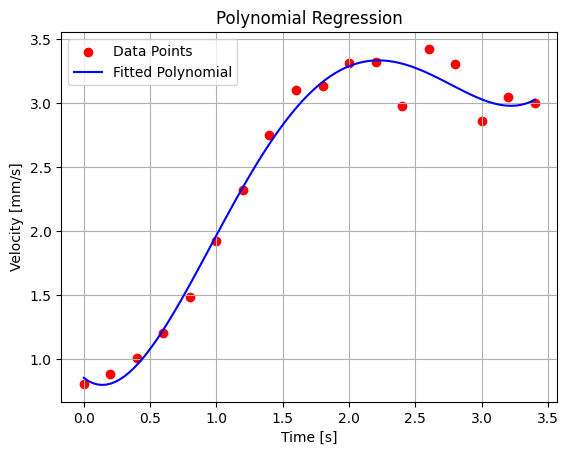

In [8]:
# Degree of polynomial
poly_degree = 4

# Fit the polynomial
coefficients = polynomial_regression_coefficients(data["Time[s]"], data["Velocity[mm/s]"], poly_degree)
print(f"Fitted polynomial coefficients: {coefficients}")

# Predict using the fitted polynomial

y_predict = predict_polynomial_regression(coefficients, x_test) 


# Plot the result
plt.scatter(data["Time[s]"], data["Velocity[mm/s]"], color="red", label="Data Points")
plt.plot(x_test, y_predict, color="blue", label="Fitted Polynomial")
plt.legend()
plt.title("Polynomial Regression")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [mm/s]")
plt.grid()
plt.show()

In [9]:
grader.check("q2.1")

q2.1 results: All test cases passed!

## Question 2: Nonlinear regression

Recall the schematic of our sliding droplet [*Avoontuur, F.; 'Electrowetting assisted droplet removal
from an inclined electrode', BEP Thesis, 2022*]:

<img src="https://imgur.com/egjH2vz.png" width=500>

The behaviour of the droplet can be described starting with a force balance:

\begin{equation}
F = \rho V a = F_G - F_P - F_D
\tag{Eq. 1}
\end{equation}

Where $\rho V$ is the mass of the droplet ($\rho$ is the water density, $V$ is the volume of the droplet), $a$ is the acceleration, and the forces are:
- $F_G$: gravitational force, $F_G = \rho V g \sin(\alpha)$, where $g$ is the gravity acceleration.
- $F_P$: pinning force, $F_P = k_1 r \gamma_{la} (\cos\theta_R - \cos\theta_A)$. In this formula, $r$ is the radius of the droplet before deformation, and $k_1$ is a constant that depends on the aspect ratio of the droplet [[Elsherbini and Jacobi]](https://www.sciencedirect.com/science/article/abs/pii/S0021979706001202). Values of $k_1$ have been reported to range from 4/$\pi$ to $\pi$ [[reference]](https://www.researchgate.net/publication/350333326_A_two-dimensional_numerical_model_for_the_sliding_motion_of_liquid_drops_by_the_particle_finite_element_method).
- $F_D$: dissipation force, proportional to the velocity: $F_D = k_2 r v$.
      
We will consider the following approximations:
- The droplet is moving in capillary regime, therefore the droplet shape can be assumed to be a spherical cap. 
- The spherical cap has a volume described by:
\begin{equation}
V = \frac{\pi R^3}{3} \left(1-\cos\theta \right)^2 (2 + \cos\theta)
\tag{Eq. 2}
\end{equation}
where in this case $\theta$ is simply $\cfrac{\theta_R + \theta_A}{2}$.

While the picture presented above better represents what is happening in a real system, the following scheme can be used as a reference to understand the geometric approximations considered here:

<img src="https://imgur.com/2dfzJIk.png" width=500>

When we gather all the information presented in the previous paragraph, the force balance can be written as:

\begin{equation}
\rho V \frac{d v}{d t} = \rho V g \sin \alpha - k_1 r \gamma_{la} (\cos\theta_R - \cos\theta_A) - k_2 r v 
\tag{Eq. 3}
\end{equation}

The known variables are:
- $\rho$, water density  $\left(1000 \ \cfrac{kg}{m^3}\right)$
- $V$, droplet volume ($60 \ \mu L = 60 * 10^{-9} \ m^3$)
- $g$, gravity acceleration  $\left(9.81 \ \cfrac{m}{s^2} \right)$
- $\alpha$, inclination ($32$ degrees)
- $\gamma_{al}$, surface tension of water  $\left(0.0728 \ \cfrac{N}{m} \right)$
- $\theta_R$ and $\theta_A$ will be respectively 52 degrees and 76 degrees

Compute $r$ according to:
\begin{align}
r &= R\sin\theta
\tag{Eq. 4}
\end{align}

The only variables left are $k_1$, the aspect ratio constant, and $k_2 \ (Pa \cdot s)$, the friction coefficient, which will be fitted using experimental data.

If equation 3 is brought into this form:

\begin{equation}
\frac{dv}{dt} = C_1 - C_2 v, \:v(t=0) = v_0
\tag{Eq. 5}
\end{equation}

then the general solution is:

\begin{equation}
v(t) = (v_0 - \frac{C_1}{C_2})e^{-C_2 t} + \frac{C_1}{C_2}
\tag{Eq. 6}
\end{equation}

In our case, $C_1$ depends on the aspect ratio constant $k_1$ and $C_2$ depends on the friction coefficient $k_2$. 
* Implement a function `v_analytical` which computes the analytical solution for $v(t)$ according to equation 6. The function should ...
    - take the variable t in seconds as an input argument of type `npt.NDArray`.
    - take the parameters C1 [m/s^2] and C2 [1/s] as input arguments of type `float`.
    - return the analytical solution of equation 6 as a `npt.NDArray`.
    
    Remember that $v_0$ [m/s] is the initial velocity of the droplet and that it should be given in [m/s].
* Use the function *scipy.optimize.curve_fit* [[documentation]](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) to fit the general solution according to the data-points. **Pay attention to the units of measurement.**

* Print the values of $C_1 [m/s^2]$, $C_2 [1/s^2]$, $k_1 [-]$ and $k_2 [Pa\cdot s]$. 
* Plot the velocity in mm/s vs time (s), both for the data-points (scatter plot) and for the fitted curve.

In [13]:
# Define variables
rho = 1000          # kg/m3
V = 60e-9           # m3 
g = 9.81            # m/s2
alpha = np.deg2rad(32)          # degrees
gamma = 0.0728      # N/m
thetaR = np.deg2rad(52)         # degrees       
thetaA = np.deg2rad(76)         # degrees
theta = (thetaR + thetaA)/2

# Geometric variables
R = ((3*V)/(np.pi*(1-np.cos(theta))**2*(2+np.cos(theta))))**(1/3)
r = R*np.sin(theta)

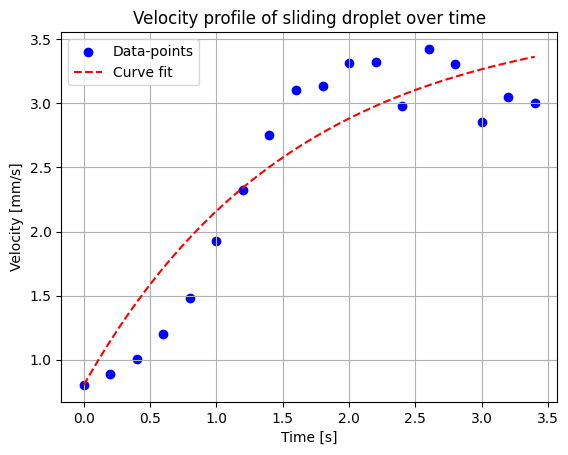

C1 [m/s^2]: 0.002336, C2 [1/s]: 0.6311
Aspect ratio constant [-]: 3.0299, Friction coefficient [Pa*s]: 0.010013


In [14]:
# Remember to convert the velocity to SI-units!
# print(data)       # when you print that data you realize that the velocities are all in mm/s, this has to be converted first to meters
data["Velocity[m/s]"] = data['Velocity[mm/s]']*1e-3 #mm to m is 10^(-3)

# Define the velocity at t=0
v0 = data["Velocity[m/s]"].iloc[0]

# Define your function v_analytical here
def v_analytical(t:npt.NDArray, C1:float, C2: float, v0 = v0)->npt.NDArray:
    """
    A function which computes the analytical solution for the general equation 6

    Args: 
        t       (npt.NDArray): the time values
        C1            (float): the first coefficient variable in [m/s2]
        C2            (float): the second coefficient variable in [1/s]

    Return:
        v       (npt.NDArray): the velocity 
    """
    v = (v0 - C1/C2)*np.exp(-C2*t) + C1/C2
    return v


# Now, let's apply curve-fitting
popt, pcov = scipy.optimize.curve_fit(v_analytical,data["Time[s]"],data["Velocity[m/s]"], p0=(1.0,1.0))
"""
Theh curve_fit funciton computes for the a guess of C1 and C2, and after which the values stored under popt are the C1 and C2 final values which result in the most accurate curve

"""
# Assign the calues for C1 and C2
C1 = popt[0]
C2 = popt[1]


"""
Comparing equation 3 and equation 5, it is possible to figure out what C1 and C2 are. 

C1 = rho*V*g*sing(alpha) - k1*r*gamma*(cos(thetaR) - cos(thetaA))

C2 = k2* r

rearange these for k1 and k2"""
# Compute k1
k1 = (g * np.sin(alpha) - C1) * rho * V / (
    gamma * r * (np.cos(thetaR) - np.cos(thetaA))
)

# Compute k2 
k2 = C2 * rho * V / r



# Plot
z = np.linspace(data["Time[s]"].iloc[0], data["Time[s]"].iloc[-1], 1000)

plt.scatter(data["Time[s]"], data["Velocity[mm/s]"], color="blue", label="Data points")
plt.plot(z, v_analytical(z, *popt) * 1000, "--", color="red", label="curve fit")
plt.xlabel("Time [s]")
plt.ylabel("Velocity [mm/s]")
plt.title("Velocity profile of sliding droplet over time")
plt.legend(["Data-points", "Curve fit"])
plt.grid()
plt.show()

# SET YOUR SOLUTION VARIABLES C1, C2, k1 AND k2 WITH THE CORRECT NAMES AS SHOWN BELOW
print(f"C1 [m/s^2]: {np.round(C1, 6)}, C2 [1/s]: {np.round(C2, 4)}")
print(
    f"Aspect ratio constant [-]: {np.round(k1, 4)}, Friction coefficient [Pa*s]: {np.round(k2, 6)}"
)

In [15]:
grader.check("q2.2")

q2.2 results: All test cases passed!

# Reflect on the results
### Question 1
Which of the three approaches (cubic spline interpolation, polynomial regression, nonlinear regression) would you have chosen for the given experimental data?


I would have chose to use polynomial regression, since looking at the experimental data points there seems to be an expenetial trend. Additional, it is not possible to have a cubic spline interpolation here since one cannot hit all the experimental point. It is better to go with a regression model which approximates the solution. 

#### Question 2

Below are several experimental-data situations. For each one, explain which modeling approach
- Spline interpolation
- Polynomial regression
- Nonlinear regression


would be most appropriate, and why.

Justify your choice based on, e.g., 
- smoothness requirements
- noise level
- known physical model vs. empirical fit
- flexibility vs. interpretability
- risk of overfitting.

*Scenario 1*: You measure the concentration of a chemical species over time using a sensor that introduces moderate noise. The true concentration–time relationship is unknown, but you need a smooth curve that captures overall trends without following noise too closely.

*Scenario 2*: You collect vapor-pressure data across a wide temperature range. A known physical model such as the Antoine equation is available, but your experimental points include noise and are sparsely sampled at low temperature.

*Scenario 3*: You measure output voltage as a function of known electrolyte concentration. The data are nearly noise-free and lie very close to a smooth curve. You must predict intermediate values precisely, there is no need not extrapolate.

*Scenario 4*: You measure the position of a vibrating mechanical system with high-frequency oscillations. You want to extract an approximate curve, not fit every oscillation.

*Scenario 5*: You have measurements of temperature in a reactor taken at irregular time intervals with gaps of 30–60 minutes. You need reliable predictions between measurements and controlled behavior when extrapolating slightly beyond the data.

#### Scenario 1:
You are measuring the concentration of a chemical species over time using a sensor that introduces moderate noise. Since there is noise in the system, the true concentration-time relationship is unknown. In this case, it is most beneficial to use a polynomial regression model, to approximate the relation by minimizing the error. The polynomial regression model will provide a smooth model which is desirable. 


#### Scenario 2:

In the case of a known physical model, one should opt to go with a nonlinear regression model. This approach incorporates physical knowledge directly, resulting in meaningful and interpretable parameters. It is robust against noise and performs well with sparse data, particularly at low temp. 

#### Scenario 3:

Since the data is essencially noise free and the curve is smooth, one can use spline interpolation to obtain the intermediate data. 

#### Scenario 4:

Polynomial regression model as the regression will smooth out all the noise in the system and keep the actual ossilations of the system.

#### Scenario 5:
Chose: Nonlinear regression
Irregular sampling and large time gaps make spline interpolation unrealialbe, as it can behave unpredictably between points. Polynomial regression can also become unstalbe and extrapolate poorly. If a reasonable physical or phenomenological model for temperature evolution exists, nonlinear regression proveds controlled interpolation and more reliable extrapolation beyond the measured data, while mainting interretability and stability. 